In [2]:
cd ..

/Users/crupley/gal/hoodie


In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle

import networkx as nx

from code.featurize import *

plt.rcParams['figure.figsize'] = 16, 10

In [20]:
from code.graph import make_edges

In [7]:
df = pickle.load(open('features.pkl', 'rb'))
df.index.name = 'node'
df.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,,,
0,37.750067,-122.441075,718895.248337,-0.000153,-0.014650,0.158808,123.369982,-0.035714,1.806452,112,80.172298
1,37.750196,-122.438933,834313.797096,-0.002185,0.169033,-0.076971,105.325899,0.039474,2.375000,152,83.318625
2,37.756794,-122.436270,900225.127625,-0.012031,0.008118,0.125270,143.830470,-0.284672,1.902778,137,93.471872
3,37.753529,-122.437050,820289.998581,0.218998,0.471783,0.216543,110.432877,-0.019108,2.308824,157,91.519785
4,37.755758,-122.433400,776981.611641,-0.008045,-0.010146,0.052978,137.947900,-0.065789,2.140845,152,92.032526


In [ ]:
df[df.lat > latmin]

In [49]:
tn = 175
testnode = df.ix[tn]

dfsmall = window(df, testnode.lat - 0.005,
                     testnode.lat + 0.005,
                     testnode.lon - 0.003,
                     testnode.lon + 0.003)[['lat', 'lon']]
print dfsmall.shape
dfsmall.head()

(46, 2)


,lat,lon
node,,
105,37.765334,-122.421672
107,37.762815,-122.420569
108,37.760968,-122.420394
173,37.766146,-122.421749
175,37.762251,-122.419786


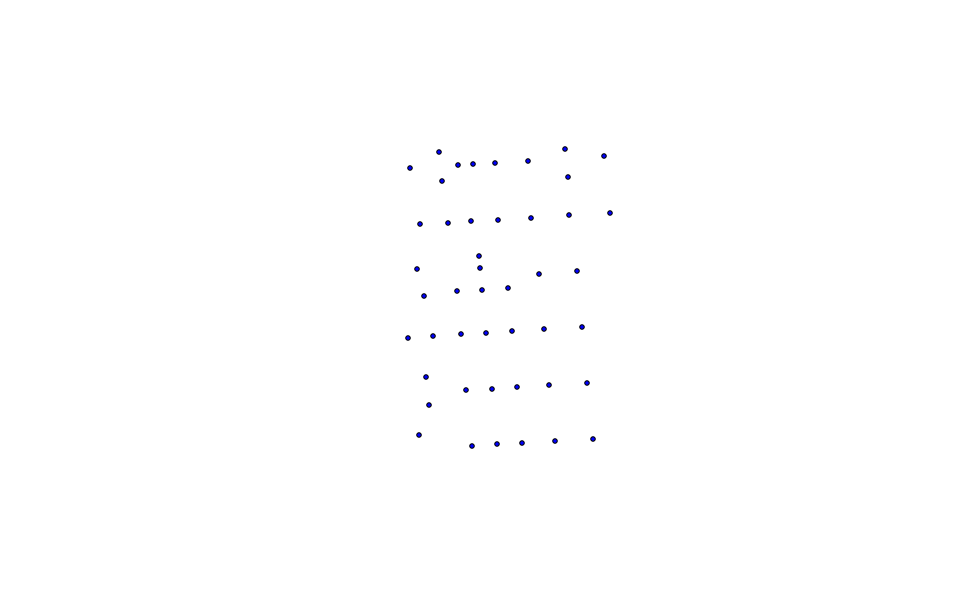

In [28]:
dfsmall.plot(kind='scatter', x = 'lon', y = 'lat')
plt.margins(0)
plt.axis('equal')
plt.axis('off');

In [30]:
%time edges = make_edges(dfsmall)
print edges.shape
edges.head()

CPU times: user 3.52 s, sys: 46.7 ms, total: 3.56 s
Wall time: 3.57 s
(167, 2)


,node1,node2
edge,,
0,105,6952
1,105,173
2,105,2164
3,105,6500
4,107,6659


IndexingError: Unalignable boolean Series key provided

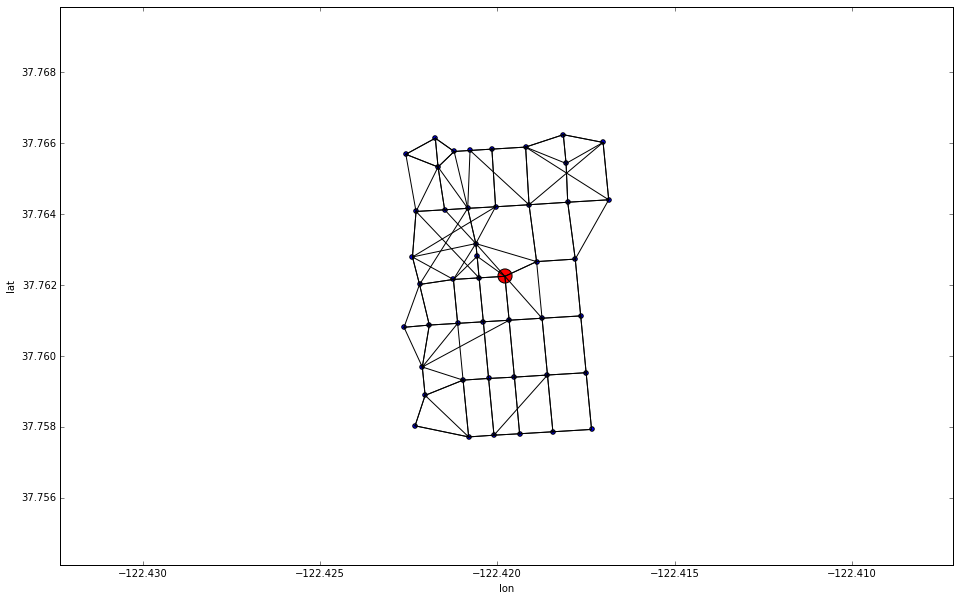

In [59]:
dfsmall.plot(kind='scatter', x = 'lon', y = 'lat')

for idx in edges.index:
    node1 = edges.ix[idx].node1
    node2 = edges.ix[idx].node2

    plt.plot([dfsmall.ix[node1].lon, dfsmall.ix[node2].lon],
             [dfsmall.ix[node1].lat, dfsmall.ix[node2].lat], c='black')

plt.scatter(dfsmall.ix[tn].lon, dfsmall.ix[tn].lat, c='red', s=200)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)

In [33]:
edges.to_csv('edgessmall.csv', index=False, header=False)

# Make graph

In [45]:
with open('edgessmall.csv', 'rb') as f:
    g = nx.read_edgelist(f, delimiter=',', nodetype=int)

In [47]:
print len(g.nodes())
print len(g.edges())

46
100


In [48]:
g[105]

{173: {}, 2164: {}, 4061: {}, 6500: {}, 6656: {}, 6952: {}}

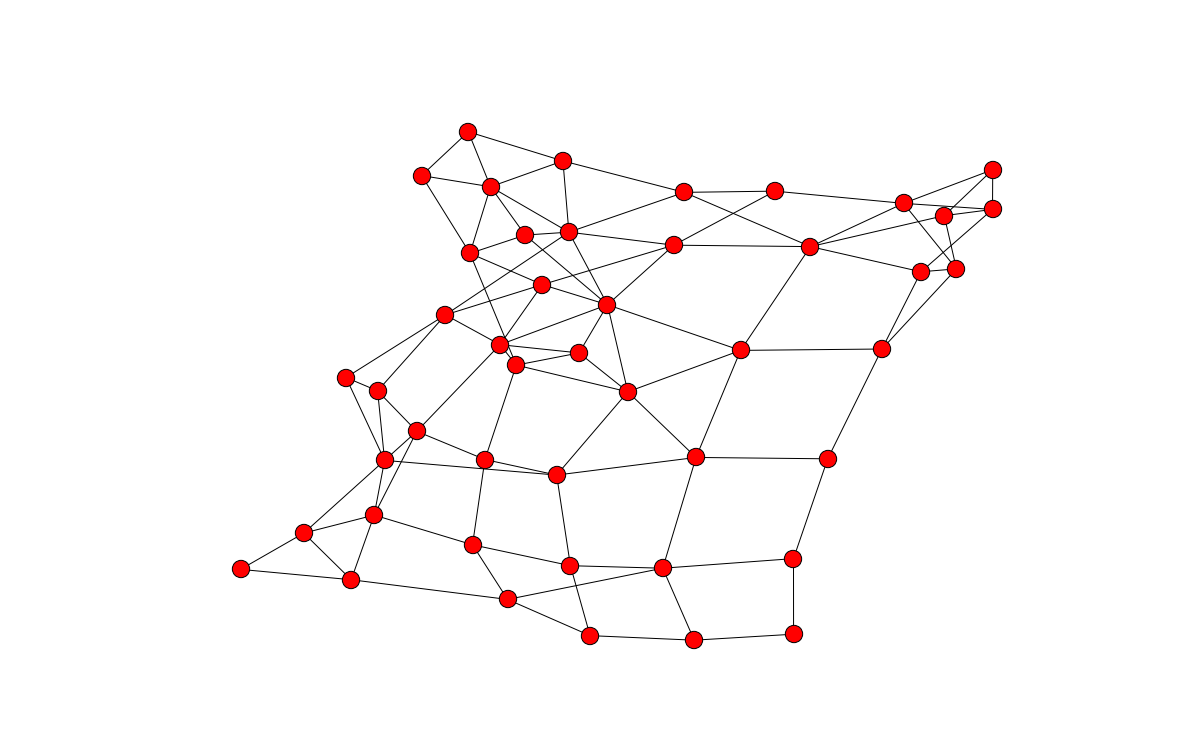

In [61]:
nx.draw(g)